<img src="../../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px" align="left">

# _*Qiskit Finance: Loading Time Series Data*_

The latest version of this notebook is available on https://github.com/qiskit/qiskit-tutorial.

***
### Contributors
Jakub Marecek<sup>[1]</sup>

### Affiliation
- <sup>[1]</sup>IBMQ

### Introduction
Across many problems in finance, one starts with time series. Here, we showcase how to download the time series from a number of common providers.

In [1]:
%matplotlib inline
from qiskit.aqua.translators.data_providers import *
from qiskit.aqua.translators.data_providers.wikipediadataprovider import StockMarket
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import datetime

Evolution of the stock price:
GOOG
Date
2016-01-04    741.84
2016-01-05    742.58
2016-01-06    743.62
2016-01-07    726.39
2016-01-08    714.47
2016-01-11    716.03
2016-01-12    726.07
2016-01-13    700.56
2016-01-14    714.72
2016-01-15    694.45
2016-01-19    701.79
2016-01-20    698.45
2016-01-21    706.59
2016-01-22    725.25
2016-01-25    711.67
2016-01-26    713.04
2016-01-27    699.99
2016-01-28    730.96
2016-01-29    742.95
Name: Adj. Close, dtype: float64
AAPL
Date
2016-01-04    101.783763
2016-01-05     99.233131
2016-01-06     97.291172
2016-01-07     93.185040
2016-01-08     93.677776
2016-01-11     95.194629
2016-01-12     96.576222
2016-01-13     94.093220
2016-01-14     96.151117
2016-01-15     93.842021
2016-01-19     93.387931
2016-01-20     93.513531
2016-01-21     93.040118
2016-01-22     97.986799
2016-01-25     96.073825
2016-01-26     96.605206
2016-01-27     90.257610
2016-01-28     90.904929
2016-01-29     94.044912
Name: Adj. Close, dtype: float64


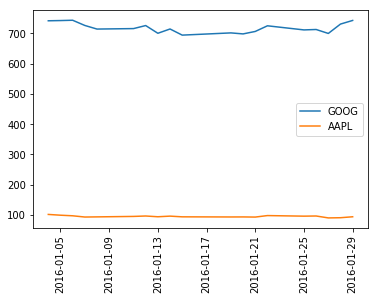

A time-series similarity measure:
[[1.00000000e+00 8.44268222e-05]
 [8.44268222e-05 1.00000000e+00]]
A covariance matrix:
[[269.60118129  25.42252332]
 [ 25.42252332   7.86304499]]


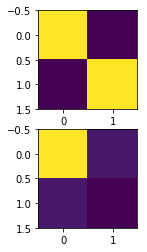

In [2]:
wiki = WikipediaDataProvider(token = "",
                 tickers = ["GOOG", "AAPL"],
                 stockmarket = StockMarket.NASDAQ.value,
                 start = datetime.datetime(2016,1,1),
                 end = datetime.datetime(2016,1,30))
wiki.run()
wiki.plot()

### [Optional] Setup token to access recent, fine-grained time-series

If you would like to download professional data, you will have to set-up a token with one of the major providers.


In [3]:
from qiskit.aqua.translators.data_providers.dataondemandprovider import StockMarket
try:
  nasdaq = DataOnDemandProvider(token = "REPLACE-ME",
                 tickers = ["GOOG", "AAPL"],
                 stockmarket = StockMarket.NASDAQ.value,
                 start = datetime.datetime(2016,1,1),
                 end = datetime.datetime(2016,1,2))
  nasdaq.run()
  nasdaq.plot()
except QiskitFinanceError as e:
    print(e)
    print("You need to replace REPLACE-ME with a valid token.")

/Users/jmarecek/anaconda3/envs/localqiskit/lib/python3.7/site-packages/urllib3/connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


'Accessing NASDAQ Data on Demand failed.'
You need to replace REPLACE-ME with a valid token.


In [4]:
from qiskit.aqua.translators.data_providers.exchangedataprovider import StockMarket
try:
  lse = ExchangeDataProvider(token = "REPLACE-ME",
                 tickers = ["AIBGl", "AVSTl"],
                 stockmarket = StockMarket.LONDON.value,
                 start = datetime.datetime(2019,1,1),
                 end = datetime.datetime(2019,1,30))
  lse.run()
  lse.plot()
except QiskitFinanceError: 
    print("You need to replace REPLACE-ME with a valid token.")

You need to replace REPLACE-ME with a valid token.
